## **Individual Health-Based Insurance Premium Forecast.**

## Data Gathering 

#### Downloading kaggle data sets direclty into colab 

In [26]:
#Installing kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


### upload kaggle.json file which contain the user kaggle detail 

In [27]:
from google.colab import drive 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [28]:
#%cd /gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction

In [29]:
#%ls

In [30]:
#Make a directory for kaggle at the tempoary instacne location on colab drive 
! mkdir ~/.kaggle

!cp /gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/kaggle.json ~/.kaggle/kaggle.json

# change the file permission to read/write to the owner only 
!chmod 600 ~/.kaggle/kaggle.json  

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Download and the extract the datasets

In [31]:
#Downlad the datasets
!kaggle datasets download noordeen/insurance-premium-prediction

^C


In [33]:
#Extracting the compressed data
!unzip insurance-premium-prediction.zip

Archive:  insurance-premium-prediction.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Data cleaning 

In [10]:
# Importing librires 

import pandas as pd  #For analyzing, cleaning, exploring, and manipulating data.
import numpy as np   # Python library used for working with arrays

In [11]:
# Loading the dataset to a pandas Dataframe 
dataset=pd.read_csv('/gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/insurance.csv')


In [76]:
# To see first five rows of dataset
dataset.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [77]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [78]:
# To check how many rows and column we having 
dataset.shape

(1338, 7)

In [79]:
#cheking for missing vaules
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
#summerizing the stats of the data
dataset.describe() 

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [81]:
# checking for data type for each column s
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
#To get list of categorical variables

# List(dataset.select_dtypes(include=['object']).columns)  Method_1
check = (dataset.dtypes == 'object') #Method_2
categorical_var = list(check[check].index)

print(f"list of categorical variables {categorical_var}")

#Finding unique number and value in categorical data
for col in categorical_var:
    unique_no = dataset[col].nunique()
    unique_value = dataset[col].unique()
    print (f'Number of varibale in {col} are: {unique_no}, there are {unique_value}')



list of categorical variables ['sex', 'smoker', 'region']
Number of varibale in sex are: 2, there are ['female' 'male']
Number of varibale in smoker are: 2, there are ['yes' 'no']
Number of varibale in region are: 4, there are ['southwest' 'southeast' 'northwest' 'northeast']


In [23]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## Data visualization

In [65]:
#Importing library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Finding correlation among **varibale**

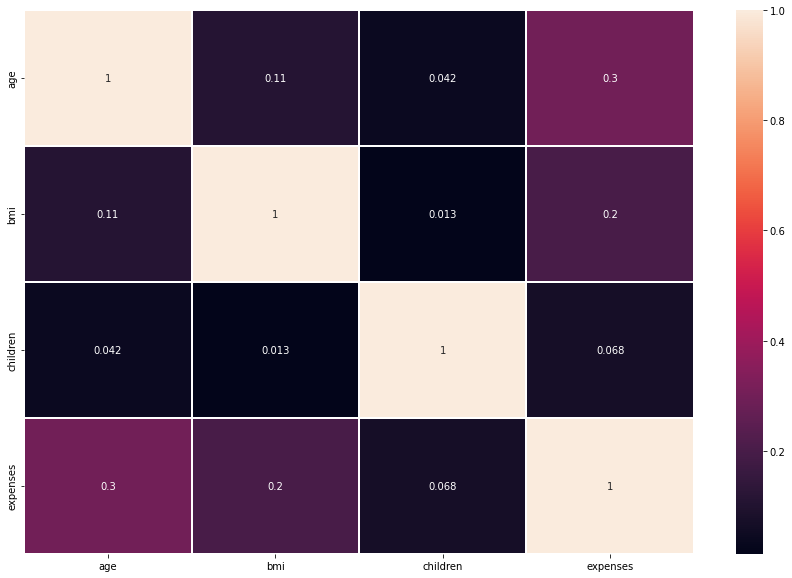

In [80]:


plt.figure(figsize = (15, 10))
sns.heatmap(dataset.corr(), annot = True, linewidths = 1)
plt.show()


There is no correlation among the variable but bmi,age have minimum correlation with expenses

### Analyzing corelation among expenses vs other variables

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'expenses vs region')

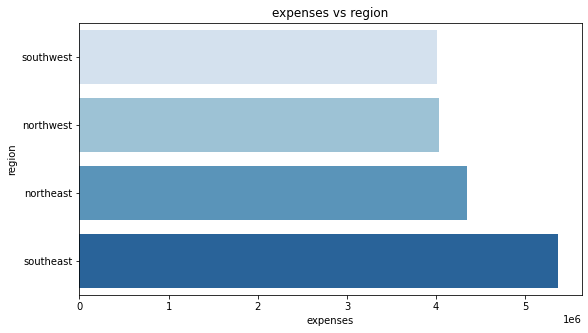

In [86]:
expenses = dataset['expenses'].groupby(dataset.region).sum().sort_values(ascending = True)
fig, axes = plt.subplots(1, 1, figsize=(9, 5))
axes = sns.barplot(expenses.head(), expenses.head().index, palette='Blues')
axes.set_title('expenses vs region')

Among all region southeast have high medical expenses

In [97]:

px.box(data_frame = dataset, x = 'region', y = 'expenses', color = 'region')


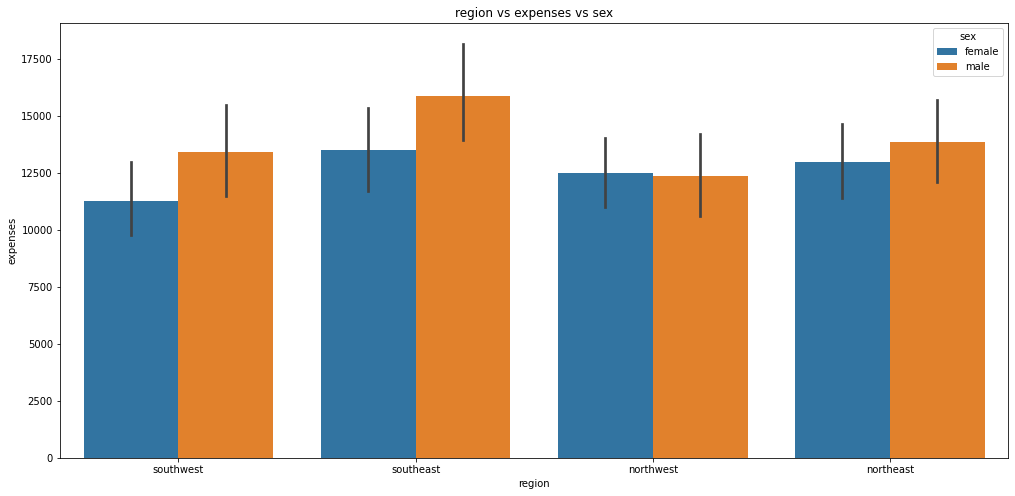

In [100]:
plt.figure(figsize = (17, 8))
sns.barplot(x = 'region', y = 'expenses', hue = 'sex', data = dataset)
plt.title('region vs expenses vs sex')
plt.show()


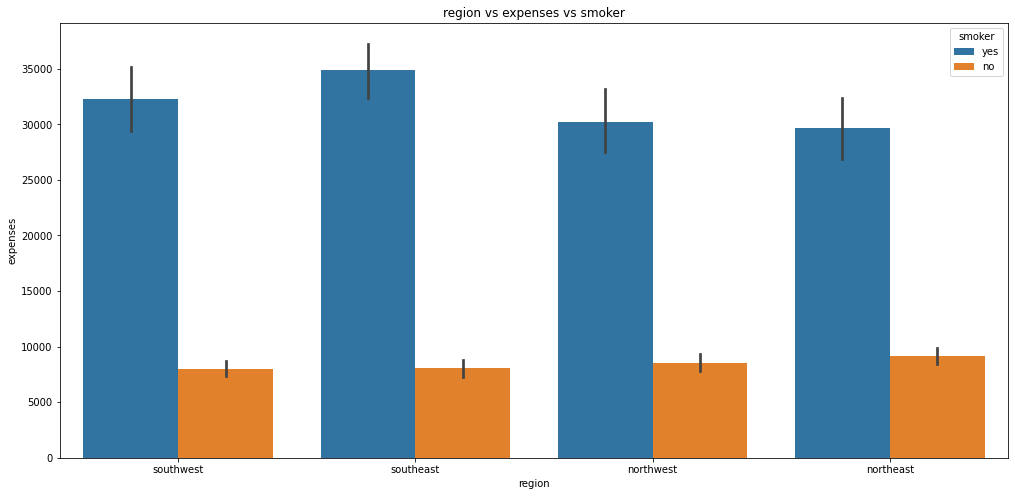

In [101]:
plt.figure(figsize = (17, 8))
sns.barplot(x = 'region', y = 'expenses', hue = 'smoker', data = dataset)
plt.title('region vs expenses vs smoker')
plt.show()

Text(0.5, 1.0, 'region vs expenses vs children')

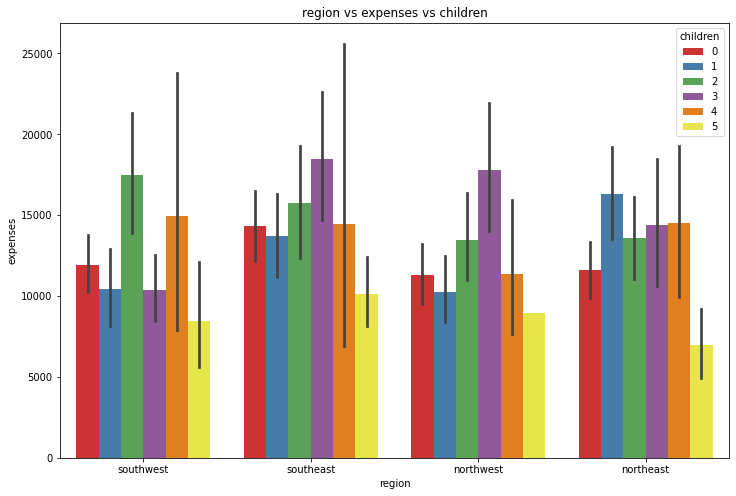

In [102]:
fig, axis = plt.subplots(1, 1, figsize=(12, 8))
axis = sns.barplot(x='region', y='expenses', hue='children', data=dataset, palette='Set1')
plt.title('region vs expenses vs children')


The Southeast region has a higher number of smokers and higher insurance premiums compared to the Northeast, which has lower premiums.Also,People with more children, such as those in the Southeast, tend to face higher insurance costs.

### Expenses with regarding sex and smoker

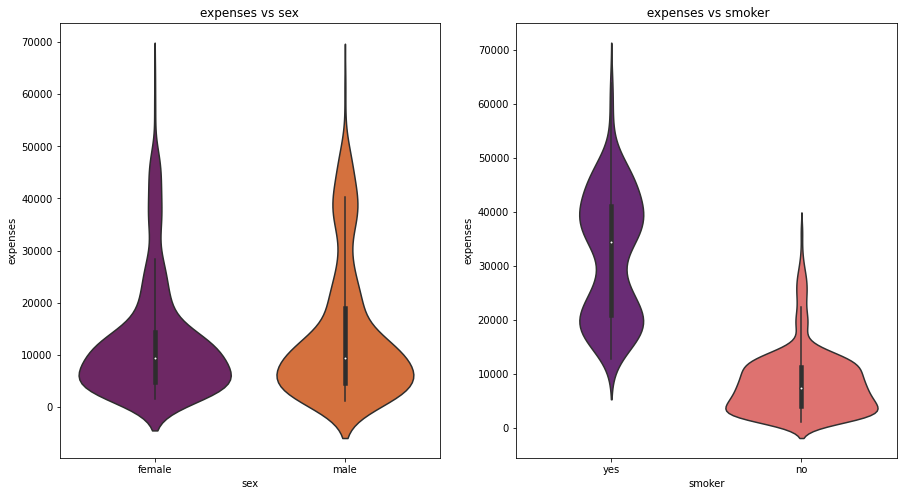

In [113]:
fig= plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.violinplot(x='sex', y='expenses',data=dataset,palette='inferno',ax=ax)
ax.set_title('expenses vs sex')

ax = fig.add_subplot(122)
sns.violinplot(x='smoker', y='expenses',data=dataset,palette='magma',ax=ax)
ax.set_title(' expenses vs smoker');

Smokers reportedly pay higher insurance premiums, with the highest amount being 70,000, whereas the maximum premium for non-smokers is only 40,000. Meanwhile, male and female policyholders pay roughly equal amounts.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



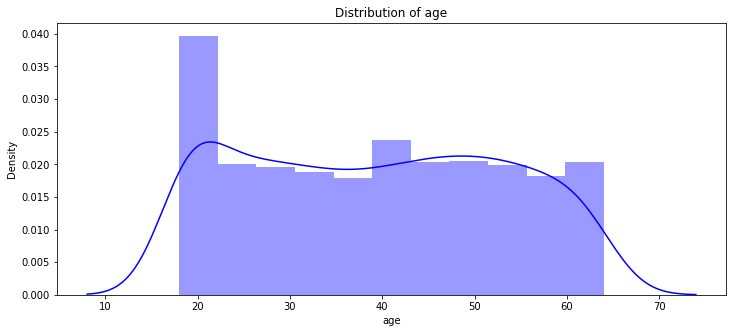

In [88]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
axis = sns.distplot(dataset["age"], color = 'b')

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'Smokers and non-smokers')

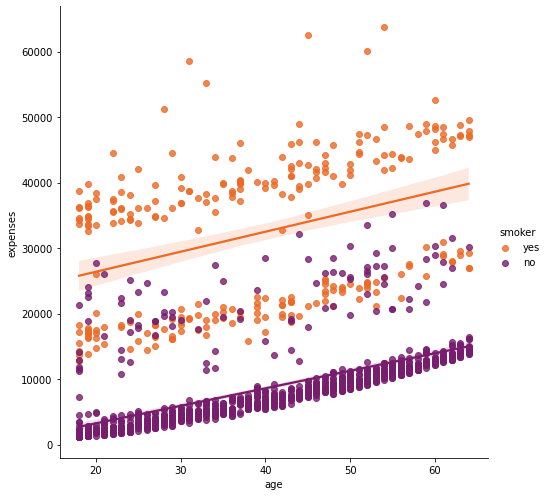

In [91]:
sns.lmplot(x="age", y="expenses", hue="smoker", data=dataset, palette = 'inferno_r', size = 7)
axis.set_title('Smokers and non-smokers')